In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC

In [13]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
Inputs=df.drop(['Outcome'],axis=1)

In [18]:
Inputs.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [19]:
Target=df['Outcome']
Target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [22]:
Inputs=scaler.fit_transform(Inputs)
Inputs

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [33]:
df1=pd.DataFrame(Inputs)

In [34]:
df1

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df1,Target,test_size=25,random_state=10)

In [36]:
len(x_train)

743

In [38]:
x_train.head()

,0,1,2,3,4,5,6,7
195,0.342981,1.161295,0.770014,1.283638,1.130518,0.940144,-0.232176,-0.360847
92,0.936914,-1.248585,0.459827,1.220910,-0.276112,1.866655,-0.636871,0.745293
349,0.342981,-3.783654,0.563223,0.719086,-0.692891,1.143215,-0.380161,0.319855
435,-1.141852,0.629244,-3.572597,-1.288212,-0.692891,1.320902,-0.805998,-0.360847
748,-0.250952,2.068912,0.046245,0.091805,1.043689,0.559387,-0.192914,0.234767


In [39]:
svm=SVC(C=10,kernel='linear')
svm

SVC(C=10, kernel='linear')

In [40]:
svm.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [43]:
svm.score(x_test,y_test)

0.68

In [44]:
y_predict=svm.predict(x_test)

In [46]:
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_predict,y_test)
cm

array([[15,  5],
       [ 3,  2]], dtype=int64)

Text(33.0, 0.5, 'TRUTH')

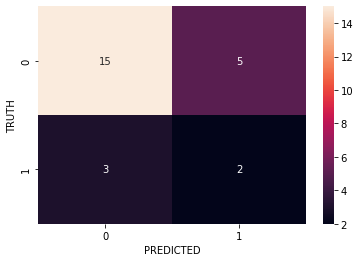

In [48]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('PREDICTED')
plt.ylabel('TRUTH')

# Making a Predictive System

In [88]:
input_data = (10,115,0,0,0,35.3,0.134,29)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



prediction = svm.predict(input_data_reshaped)
print(prediction)

# if (prediction[1] == 1):
#       print('The person is not diabetic')
# else:
#       print('The person is diabetic')

[1]


In [80]:
data=(10,139,80,0,0,27.1,1.441,57)

arr=np.asanyarray(data).reshape(1,-1)
arr

array([[ 10.   , 139.   ,  80.   ,   0.   ,   0.   ,  27.1  ,   1.441,
         57.   ]])

In [81]:
svm.predict(arr)

array([1], dtype=int64)